<h2 style= "color:red" align = "center"> Polynomial Regression: Fish Weight Prediction </h2>

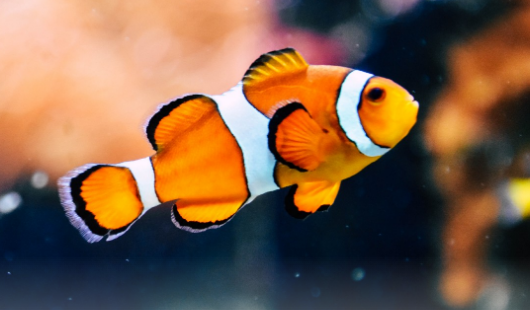

In [6]:
from IPython.display import Image
Image(filename = "E:\Python\ML_Learn\Linear Regression\Fish_Weight_Prediction\Fishweight.png")

**Problem:** Create a machine learning model to predict the weight of the fish based on the body measurement data of seven types of fish species. You can download the dataset from Kaggle.

# Import The Required Files
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* pandas: Used for data manipulation and analysis
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn : It is also data visualization library, based on matplotlib
* linear_model: Sklearn linear regression model
* train_test_split : helper function from Sklearn library for splitting the dataset
* sklearn.metrics : Library encapsulate functions to measure the model performance
* PolynomialFeatures : This used to generate polynomial features. In this study we are going to generate second degree features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Load The Data

In [3]:
first_df = pd.read_csv("E:\Python\ML_Learn\Linear Regression\Fish_Weight_Prediction\Fish.csv")
first_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Understand The Data
* There are total 159 rows(training samples) and 7 columns in dataset. 
* Each column details are as below 
* There are types of fish: Bream, Roach, Whitefish, Pakkki, Perch, Pike, Smelt. 
 
| Column Name | Details
| ------------|--------------
| Species     | Species name of fish 
| Weight      | Weight of fish in gram     
| Length1     | Vertical length in CM
| Length2     | Diagonal length in CM
| Length3     | Cross length in CM
| Height      | Height in CM
| Width       | Diagonal width in CM   
 
* Features/input values/independent variables are 'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'
* Target/output value/dependent variable is 'Weight'
* So, we have to estimate the weight of the fish based on its measurement values.

In [4]:
first_df = first_df.rename(columns = {"Length1": "VerticalLen","Length2": "DiagonalLength","Length3": "CrossLength" })
first_df

,Species,Weight,VerticalLen,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


#  Data Analysis Cleaning and Visualization (Preprocessing Data)

## Correlation Check
Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Finally, a value of zero indicates no relationship between the two variables x and y.
* Correlation helps us investigate and establish relationships between variables.
* Note that high amount of correlation between independent variables suggest that linear regression estimation will be unreliable.


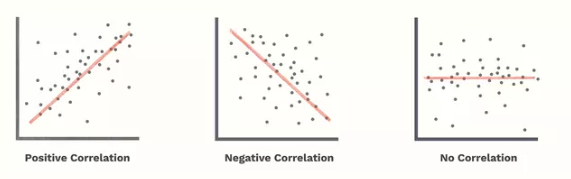

In [7]:
Image(filename = "E:\Python\ML_Learn\Linear Regression\Fish_Weight_Prediction\Corr.png")

In [ ]:
first_df.corr()

## Visualize correlation coeficient

Text(0.5, 1.0, 'CORRELATION MATRIX')

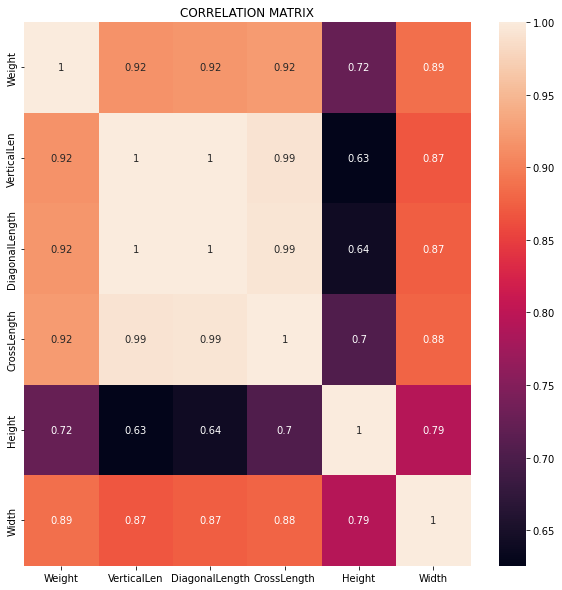

In [15]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(data = first_df.corr(), annot = True)
plt.title('CORRELATION MATRIX')

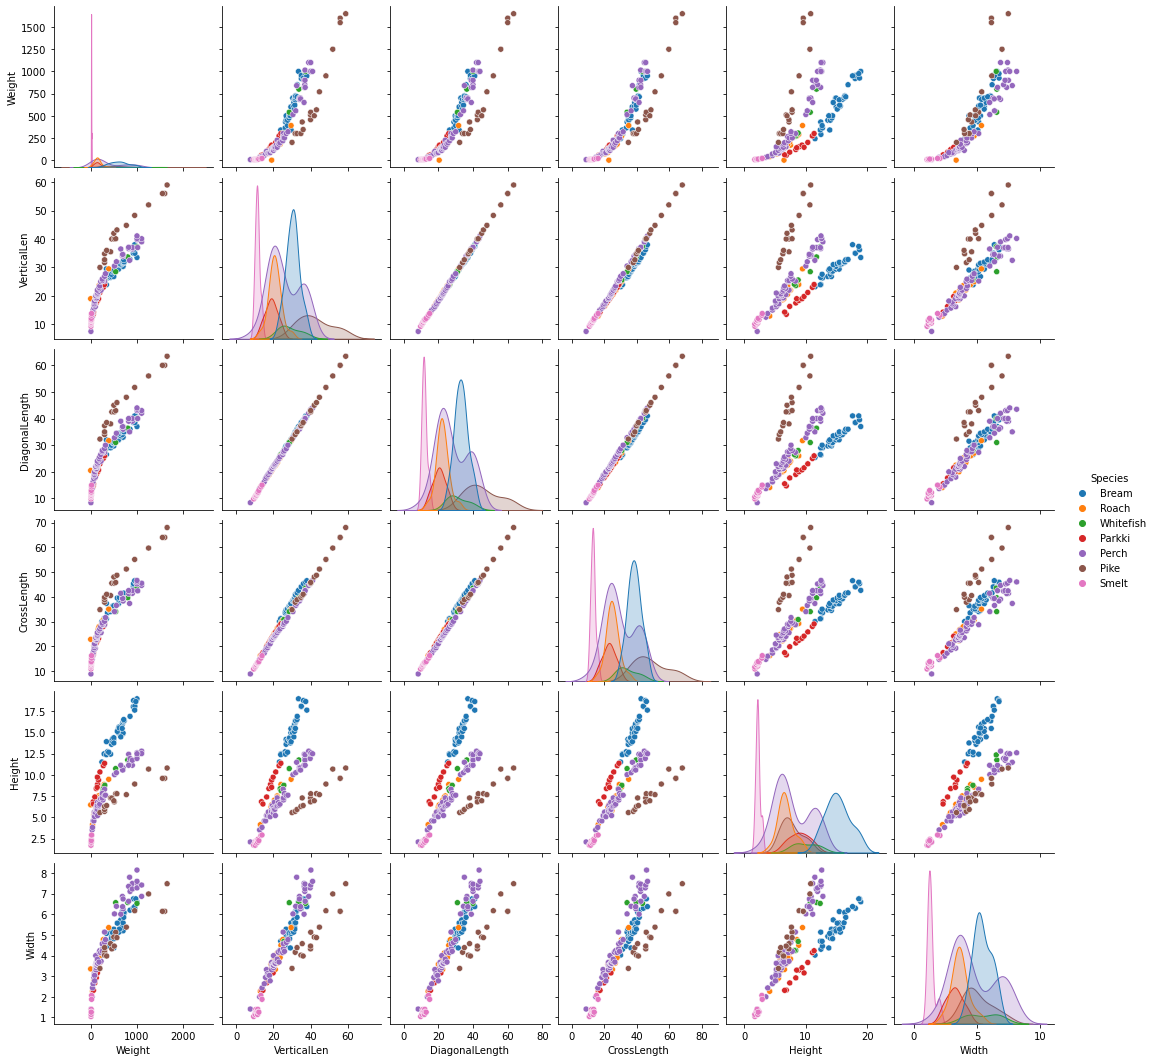

In [16]:
#Full correlation between all independent variables
sns.pairplot(first_df, kind = 'scatter', hue = 'Species')

In [8]:
#Consider some main features 
df2= first_df.drop(["VerticalLen","DiagonalLength","CrossLength"],axis = 1)
df2

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690
156,Smelt,12.2,2.2770,1.2558
157,Smelt,19.7,2.8728,2.0672


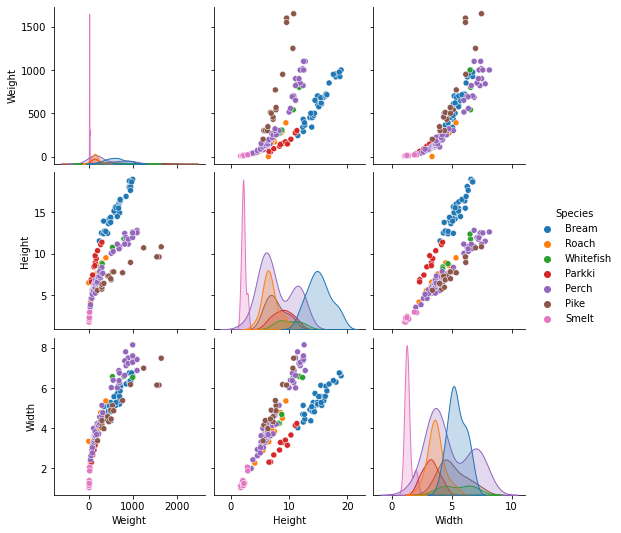

In [9]:
sns.pairplot(data = df2, kind = "scatter", hue = "Species")

From the above pair plot, we can see that there seems to be some correlations between  Height, Width and the Weight. Note that since we have multiple species the correlation between Height and Width of all species is not exactly linear with Weight.

## Outlier detection and removal

* Outlier is an extremely high or extremely low value in our data
* We use below formula to identify the outlier
  ```
    ( Greater than Q3 + 1.5 * IQR ) OR ( Lower than Q1 -1.5 * IQR )
 
    where,
    Q1  = First quartile
    Q3  = Third quartile
    IQR = Interquartile range (Q3 - Q1)
  ```
 
* We will use box plot for outlier visualization. 
* Vertical line on the left side of box plot represent the 'min' value of dataset and vertical line on right side of box plot represent the 'max' value of dataset. Any value which is outside this range is outlier and represented by '*'
 


In [19]:
#Function for outlier detection
def outlier_detection(dataframe):
#     Input Parameters
#   ----------------
#   dataframe : single column dataframe
  
#   Output Parameters
#   -----------------
#   outlier : Index of outlier training examples.
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5*IQR
    lower_threshold = Q1 - 1.5*IQR
    outlier = dataframe[(dataframe < lower_threshold) | (dataframe > upper_threshold)]
    return outlier

###  Outlier detection for Weight, Height, Width

Text(0.5, 1.0, 'Outlier Detection For Weight')

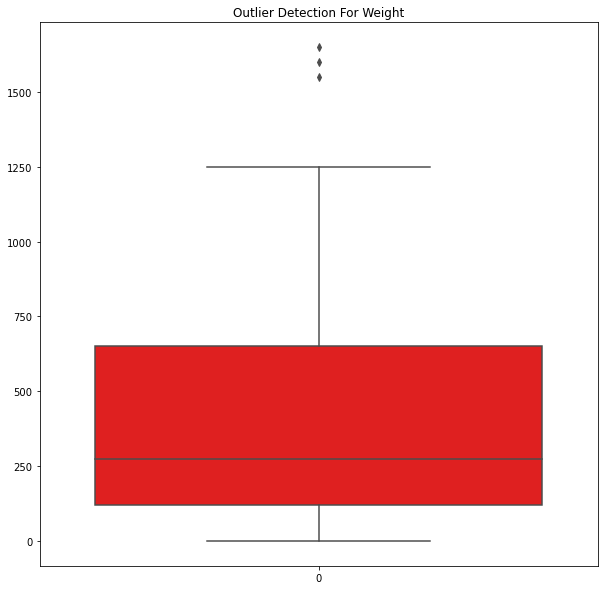

In [21]:
#Boxplot "Weight"
sns.boxplot(data = df2["Weight"],color = "red")
plt.title("Outlier Detection For Weight")
# There are 3 outliers

In [22]:
#print three outliers
print(outlier_detection(df2["Weight"]))

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


Text(0.5, 1.0, 'Outlier Detection For Height')

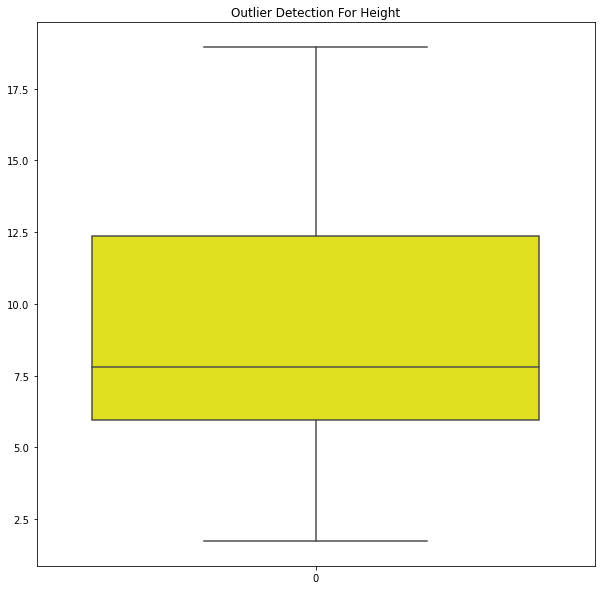

In [23]:
#Boxplot "Weight"
sns.boxplot(data = df2["Height"],color = "yellow")
plt.title("Outlier Detection For Height")
# There are no outliers

In [24]:
#No outlier for height
print(outlier_detection(df2["Height"]))

Series([], Name: Height, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Width')

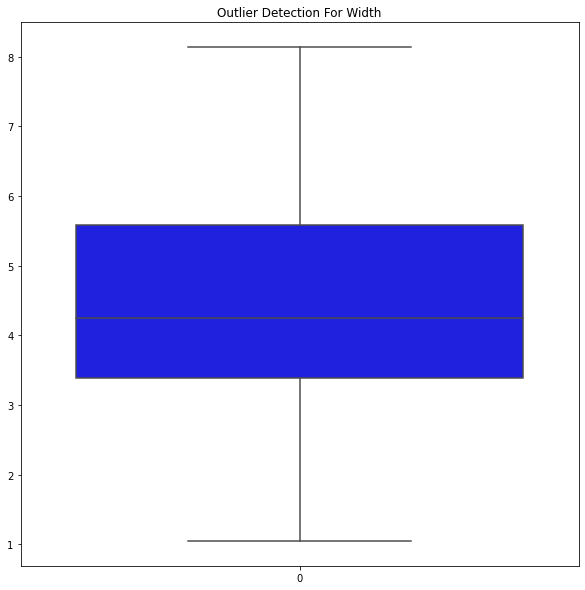

In [25]:
#Boxplot "Width"
sns.boxplot(data = df2["Width"],color = "blue")
plt.title("Outlier Detection For Width")
# There are no outliers

In [26]:
#No outlier for width
print(outlier_detection(df2["Width"]))

Series([], Name: Width, dtype: float64)


In [27]:
for column in df2.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df2[column])
    print(outlier)


Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


###  Outlier detection each species

In [28]:
df_temp = df2.drop(["Weight"],axis = 1)
df_temp
#df_temp is just used for boxplot

,Species,Height,Width
0,Bream,11.5200,4.0200
1,Bream,12.4800,4.3056
2,Bream,12.3778,4.6961
3,Bream,12.7300,4.4555
4,Bream,12.4440,5.1340
...,...,...,...
154,Smelt,2.0904,1.3936
155,Smelt,2.4300,1.2690
156,Smelt,2.2770,1.2558
157,Smelt,2.8728,2.0672


#### Outlier detection for Bream species

Text(0.5, 1.0, 'Outlier detection for Bream species')

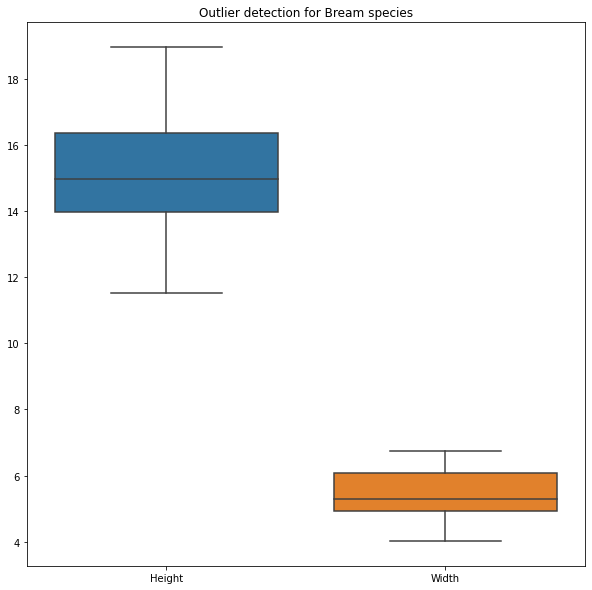

In [29]:
sns.boxplot(data = df_temp[df_temp.Species == "Bream"])
plt.title("Outlier detection for Bream species")

In [30]:
df_bream = df2[df2.Species == "Bream"]
for column in df2.columns[1:]:
    print('\nOutlier in column "%s" ' % column)
    print(outlier_detection(df_bream[column]))


Outlier in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outlier in column "Height" 
Series([], Name: Height, dtype: float64)

Outlier in column "Width" 
Series([], Name: Width, dtype: float64)


--> **THERE IS NO OUTLIER IN BREAM SPECIES**

#### Outlier detection for Roach species

Text(0.5, 1.0, 'Outlier detection for Roach species')

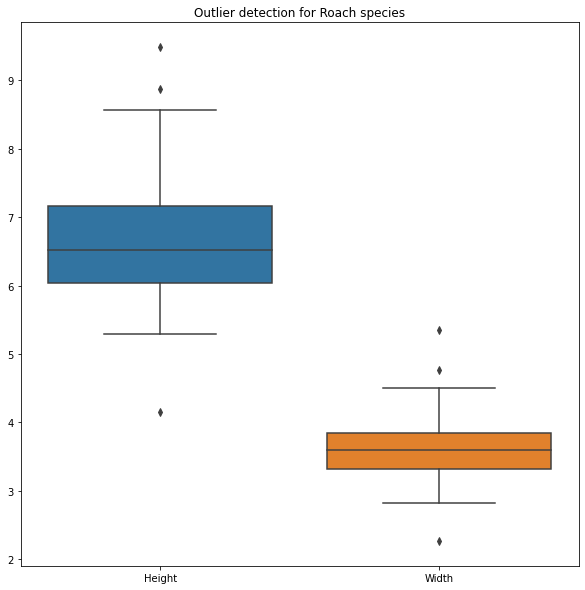

In [31]:
sns.boxplot(data = df_temp[df_temp.Species =="Roach"])
plt.title("Outlier detection for Roach species")

In [32]:
df_roach = df2[df2.Species == "Roach"]
for column in df_roach.columns[1:]:
    print('\nOutlier in column "%s" ' %column)
    print(outlier_detection(df_roach[column]))


Outlier in column "Weight" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outlier in column "Height" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outlier in column "Width" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64


--> **THERE ARE OUTLIERS IN ROACH SPECIES**

#### Outlier detection for Whilefish species

Text(0.5, 1.0, 'Outlier detection for Whitefish species')

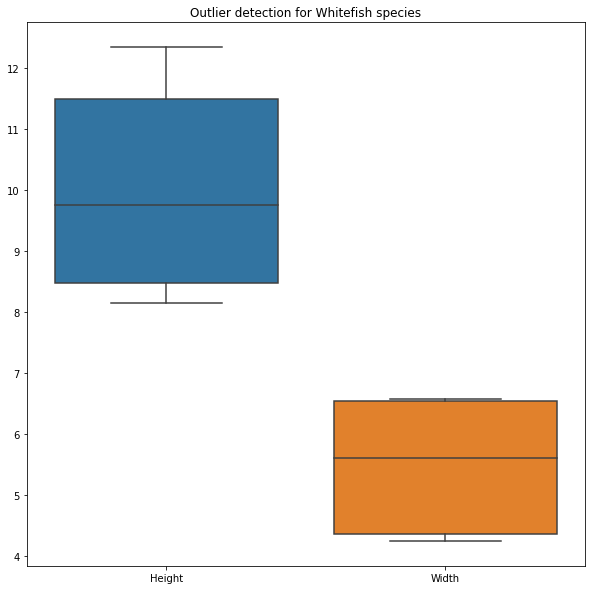

In [33]:
sns.boxplot(data = df_temp[df_temp.Species =="Whitefish"])
plt.title("Outlier detection for Whitefish species")

In [34]:
df_whitefish = df2[df2.Species == "Whitefish"]
for column in df_whitefish.columns[1:]:
    print('\nOutlier in column "%s" ' %column)
    print(outlier_detection(df_whitefish[column]))


Outlier in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outlier in column "Height" 
Series([], Name: Height, dtype: float64)

Outlier in column "Width" 
Series([], Name: Width, dtype: float64)


--> **THERE IS NO OUTLIER IN WHITEFISH SPECIES**

#### Outlier detection for Parkki species

Text(0.5, 1.0, 'Outlier detection for Parkki species')

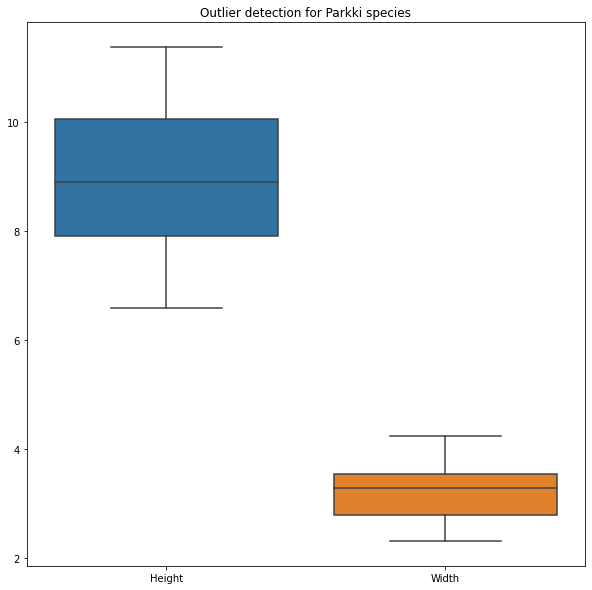

In [35]:
sns.boxplot(data = df_temp[df_temp.Species =="Parkki"])
plt.title("Outlier detection for Parkki species")

In [36]:
df_Parkki = df2[df2.Species == "Parkki"]
for column in df_Parkki.columns[1:]:
    print('\nOutlier in column "%s" ' %column)
    print(outlier_detection(df_Parkki[column]))


Outlier in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outlier in column "Height" 
Series([], Name: Height, dtype: float64)

Outlier in column "Width" 
Series([], Name: Width, dtype: float64)


--> **THERE IS NO OUTLIER IN PARKKI SPECIES**

#### Outlier detection for Perch species

Text(0.5, 1.0, 'Outlier detection for Perch species')

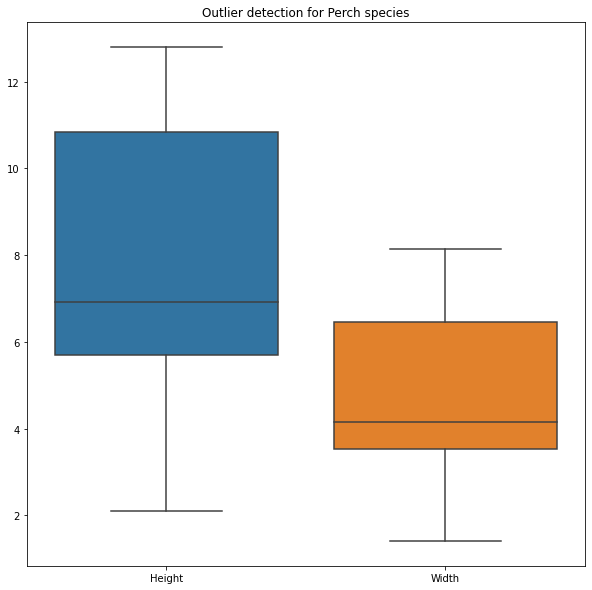

In [37]:
sns.boxplot(data = df_temp[df_temp.Species =="Perch"])
plt.title("Outlier detection for Perch species")

In [38]:
df_Perch = df2[df2.Species == "Perch"]
for column in df_Perch.columns[1:]:
    print('\nOutlier in column "%s" ' %column)
    print(outlier_detection(df_Perch[column]))


Outlier in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outlier in column "Height" 
Series([], Name: Height, dtype: float64)

Outlier in column "Width" 
Series([], Name: Width, dtype: float64)


--> **THERE IS NO OUTLIER IN PERCH SPECIES**

#### Outlier detection for Pike species

Text(0.5, 1.0, 'Outlier detection for Pike species')

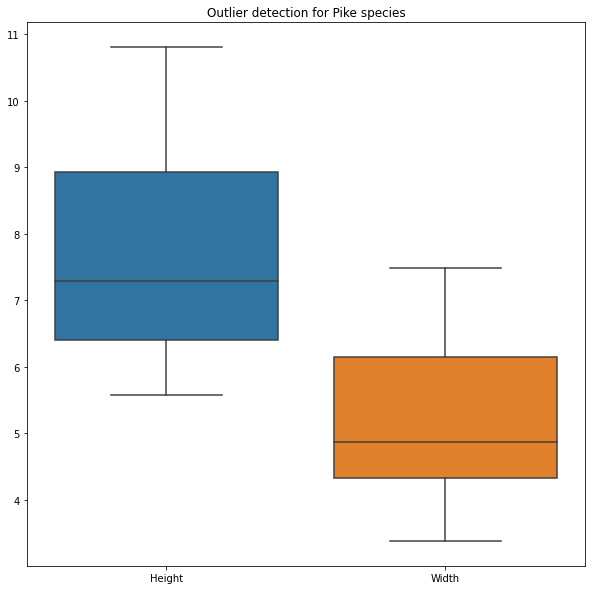

In [39]:
sns.boxplot(data = df_temp[df_temp.Species =="Pike"])
plt.title("Outlier detection for Pike species")

In [40]:
df_Pike = df2[df2.Species == "Pike"]
for column in df_Pike.columns[1:]:
    print('\nOutlier in column "%s" ' %column)
    print(outlier_detection(df_Pike[column]))


Outlier in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outlier in column "Height" 
Series([], Name: Height, dtype: float64)

Outlier in column "Width" 
Series([], Name: Width, dtype: float64)


--> **THERE IS NO OUTLIER IN PIKE SPECIES**

#### Outlier detection for Smelt species

Text(0.5, 1.0, 'Outlier detection for Smelt species')

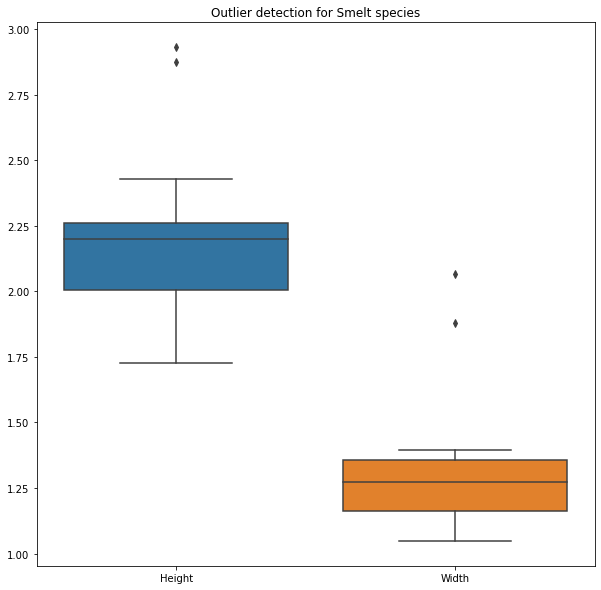

In [41]:
sns.boxplot(data = df_temp[df_temp.Species =="Smelt"])
plt.title("Outlier detection for Smelt species")

In [42]:
df_Smelt = df2[df2.Species == "Smelt"]
for column in df_Smelt.columns[1:]:
    print('\nOutlier in column "%s" ' %column)
    print(outlier_detection(df_Smelt[column]))


Outlier in column "Weight" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outlier in column "Height" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outlier in column "Width" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


### Dropping the outlier rows
* If we don't consider species specific measurement then outlier are 142, 143 and 144
* And as per species specific measurement outliers are 35, 54, 157 and 158
* Lets drop the species specific outliers only.

In [10]:
df3 = df2.drop([35,54,157,158])
df3

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
152,Smelt,9.9,2.2139,1.1659
153,Smelt,9.8,2.2044,1.1484
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690


### Using Domain Knowledge For Data Cleaning
Now lets use some common sense and find and remove the training data where weight of fish is 0 or negative

In [11]:
wrong = df3[df3["Weight"] <= 0]
wrong

,Species,Weight,Height,Width
40,Roach,0.0,6.4752,3.3516


In [12]:
df3 = df3.drop(df3[df3["Weight"] <= 0].index)
df3

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340
...,...,...,...,...
152,Smelt,9.9,2.2139,1.1659
153,Smelt,9.8,2.2044,1.1484
154,Smelt,12.2,2.0904,1.3936
155,Smelt,13.4,2.4300,1.2690


## One Hot Encoding
* Use to convert text variable to numerical format in order to use as independent variable in linear model.
* Since Species is categorical value, we are going to use One Hot Encoding to convert it into numerical format.
* [One Hot Encoding](https://satishgunjal.com/one_hot_encoding/)

In [13]:
dummy_species = pd.get_dummies(data = df3.Species)
dummy_species

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
152,0,0,0,0,0,1,0
153,0,0,0,0,0,1,0
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0


In [14]:
#Concatanate to initial dataframe to establish new dataframe for training
train_df = pd.concat((df3,dummy_species),axis = 1)
train_df

,Species,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
152,Smelt,9.9,2.2139,1.1659,0,0,0,0,0,1,0
153,Smelt,9.8,2.2044,1.1484,0,0,0,0,0,1,0
154,Smelt,12.2,2.0904,1.3936,0,0,0,0,0,1,0
155,Smelt,13.4,2.4300,1.2690,0,0,0,0,0,1,0


Since we have dummy variables we can drop the 'Species' column and to avoide the 'Dummy Variable Trap' problem we will also drop 'Whitefish' column.
What is Dummy Variable Trap and Multicollinearity: [Dummy Variable Trap](https://www.statology.org/dummy-variable-trap/?fbclid=IwAR02o7it2oHUudutZZRAZPM8El73vLtCk1f8bg883mybS28p3D3RFvtVWn8), [Multicollinearity](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.)

**Dummy Variable Trap:**

The Dummy variable trap is a scenario where there are attributes that are highly correlated (Multicollinear) and one variable predicts the value of others. When we use one-hot encoding for handling the categorical data, then one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models leads to a dummy variable trap. So, the regression models should be designed to exclude one dummy variable. 

For Example – 
Let’s consider the case of gender having two values male (0 or 1) and female (1 or 0). Including both the dummy variable can cause redundancy because if a person is not male in such case that person is a female, hence, we don’t need to use both the variables in regression models. This will protect us from the dummy variable trap.

In [15]:
train_df = train_df.drop(["Species","Whitefish"],axis = 1)
train_df

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0
3,363.0,12.7300,4.4555,1,0,0,0,0,0
4,430.0,12.4440,5.1340,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
152,9.9,2.2139,1.1659,0,0,0,0,0,1
153,9.8,2.2044,1.1484,0,0,0,0,0,1
154,12.2,2.0904,1.3936,0,0,0,0,0,1
155,13.4,2.4300,1.2690,0,0,0,0,0,1


# Build Machine Learning Model

In [16]:
x = train_df[["Height","Width","Bream","Parkki","Perch","Pike","Roach","Smelt"]]
y = train_df[["Weight"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2) #Take 20% dataset for testset
print('x_train dimension= ', x_train.shape)
print('x_test dimension= ', x_test.shape)
print('x_train dimension= ', y_train.shape)
print('x_train dimension= ', y_test.shape)

x_train dimension=  (123, 8)
x_test dimension=  (31, 8)
x_train dimension=  (123, 1)
x_train dimension=  (31, 1)


# Build Machine Learning Model

## Numpy polyfit to fit coefficent of polynomial - Visualization training test


* **numpy.polyfit**: Used to fit a polynomial function of given degrees. It returns the coefficients (which minimizes the squared error) of the polynomial equation
  - This function takes three arguments to fit a polynomial function to given data. X values, Y values and degrees (1,2,3...n)
  - Polynomial equation of degree 1 is linear equation: **y = mx + b**
  - Polynomial equation of degree 2 is quadratic equation: **y = ax^2 + bx + c**
  - So polyfit function will return the coefficients of the polynomial equation. For linear equation coeff will be [m,b] and for quadratic equation coeff will be [a,b,c]
* **numpy.poly1d**: Is used to define the polynomial function using the coefficients returned by 'numpy.polyfit'
  - It takes polynomial coefficients as argument and construct a polynomial.
  - For e.g. if there are three coeff then it will construct quadratic equation
* **numpy.linspace**: Takes three arguments (start, stop and num) and generates evenly spaced values(same as 'num') within 'start' and 'stop' range

In [17]:
x_train

,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
142,9.6000,6.1440,0,0,0,1,0,0
93,5.9532,3.6300,0,0,1,0,0,0
139,7.6800,5.3760,0,0,0,1,0,0
19,14.4738,5.7276,1,0,0,0,0,0
124,11.9328,7.2772,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
105,7.2828,4.5662,0,0,1,0,0,0
85,6.3840,3.5340,0,0,1,0,0,0
36,5.2983,2.8217,0,0,0,0,1,0
133,6.3960,3.9770,0,0,0,1,0,0


**Build first and second degree polynomial regression for "Height" and "Width" toward "Weight".**

## Fit and visualize between "Height" and "Weight" for train data 

Text(0.5, 1.0, 'Height - Weight scatter from training data')

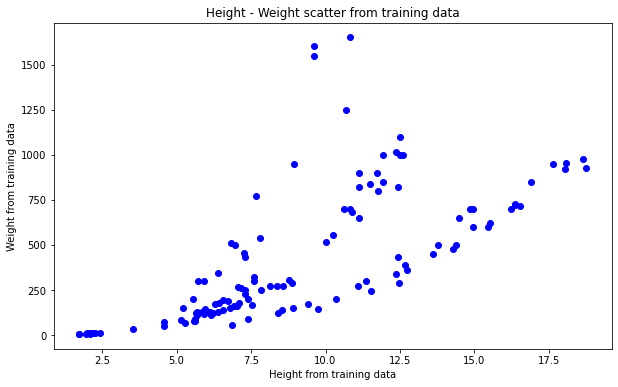

In [87]:
#Visualize relationship between "Height" and "Weight"
plt.scatter(x_train.Height, y_train,color = "blue")
plt.xlabel("Height from training data")
plt.ylabel("Weight from training data")
plt.title("Height - Weight scatter from training data")

In [27]:
#Create linear function of height 
x_height = x_train.Height
y_height = np.squeeze(y_train) #Convert y_train columns to 1d-array
linear_height = np.poly1d(np.polyfit(x_height,y_height,1))
print(linear_height)

 
61.45 x - 138.1


In [50]:
#Create quadratic function of height 
quadratic_height = np.poly1d(np.polyfit(x_height,y_height,2))
print(quadratic_height)

        2
-1.971 x + 100.1 x - 292.5


In [49]:
#Create cubic function of height 
cubic_height = np.poly1d(np.polyfit(x_height,y_height,3))
print(cubic_height)

         3         2
-0.3719 x + 8.922 x + 9.424 x - 91.96


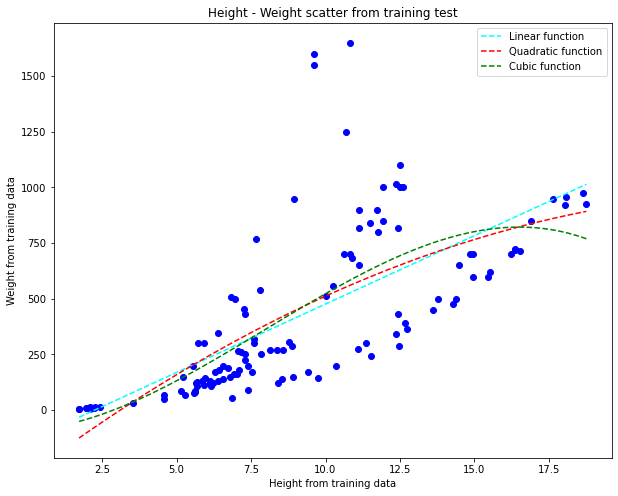

In [40]:
#Plotting
#Visualize relationship between "Height" and "Weight"
plt.scatter(x_train.Height, y_train,color = "blue")
plt.xlabel("Height from training data")
plt.ylabel("Weight from training data")
plt.title("Height - Weight scatter from training test")
values = np.linspace(x_height.min(),x_height.max(),len(x_height)) #Create range values of x coordinate
plt.plot(values,linear_height(values),color = "cyan",linestyle = "dashed",label ="Linear function")
plt.plot(values,quadratic_height(values),color = "red",linestyle = "dashed",label ="Quadratic function")
plt.plot(values,cubic_height(values),color = "green",linestyle = "dashed",label ="Cubic function")
plt.rcParams["figure.figsize"] = (10,8)
plt.legend()
plt.show()

## Fit and visualize between "Width" and "Weight":

Text(0.5, 1.0, 'Width - Weight scatter from training test')

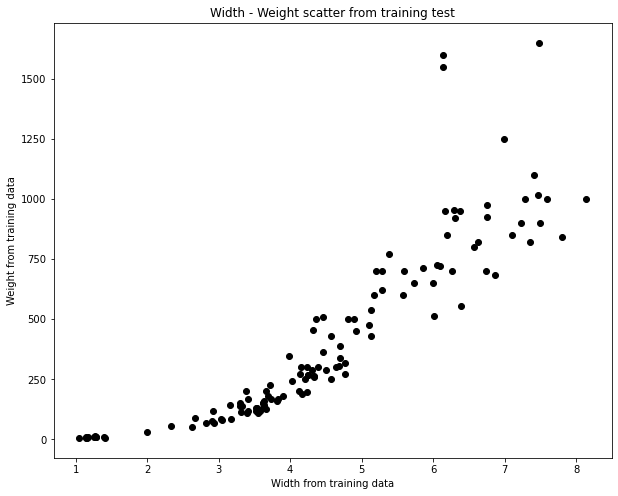

In [41]:
#Visualize relationship between "Width" and "Weight"
plt.scatter(x_train.Width, y_train,color = "black")
plt.xlabel("Width from training data")
plt.ylabel("Weight from training data")
plt.title("Width - Weight scatter from training test")

In [65]:
#Create linear function of width
x_width = x_train.Width
y_width = np.squeeze(y_train) #Convert y_train columns to 1d-array
linear_width = np.poly1d(np.polyfit(x_width,y_width,1))
print(linear_width)

 
189.6 x - 431.8


In [66]:
#Create quadratic function of width
quadratic_width = np.poly1d(np.polyfit(x_width,y_width,2))
print(quadratic_width)

       2
19.58 x + 14.06 x - 96.04


In [71]:
#Create cubic function of width
cubic_width = np.poly1d(np.polyfit(x_width,y_width,3))
print(cubic_width)

        3         2
-10.27 x + 153.2 x - 489.3 x + 414.6


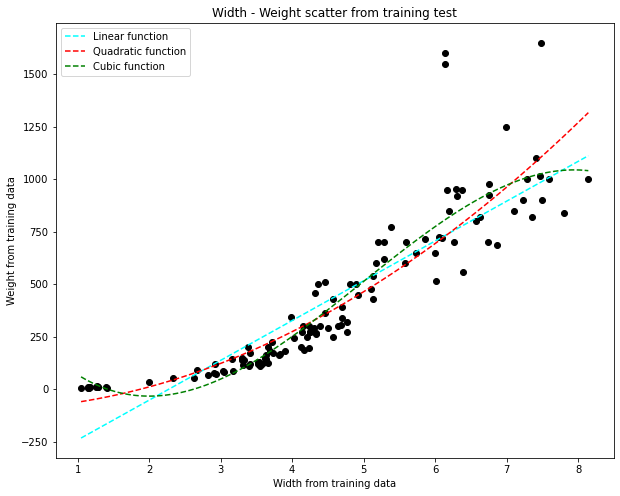

In [77]:
#Plotting
#Visualize relationship between "Height" and "Weight"
plt.scatter(x_train.Width, y_train,color = "black")
plt.xlabel("Width from training data")
plt.ylabel("Weight from training data")
plt.title("Width - Weight scatter from training test")
values2 = np.linspace(x_width.min(),x_width.max(),len(x_train.Width)) #Create range values of x coordinate
plt.plot(values2,linear_width(values2),color = "cyan",linestyle = "dashed",label ="Linear function")
plt.plot(values2,quadratic_width(values2),color = "red",linestyle = "dashed",label ="Quadratic function")
plt.plot(values2,cubic_width(values2),color = "green",linestyle = "dashed",label ="Cubic function")
plt.legend()
plt.show()

In [95]:
#Another function for ploting (Example for linear and quadratic function)
def polynomial_plot(feature, label):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = feature
  y_coordinates = np.squeeze(label)

  #Contruct first degree polynomial function
  linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
  # Contruct second degree polynomial function
  quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
  # Contruct third degree polynomial function
  cubic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
 
  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Linear Function')
  plt.plot(values, quadratic_func(values), color='red', label='Quadratic Function')
  plt.plot(values, cubic_func(values), color='green', label='Cubic Function')
  plt.xlabel('%s From Data'%(feature.name))
  plt.ylabel('Weight')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
  plt.show()  

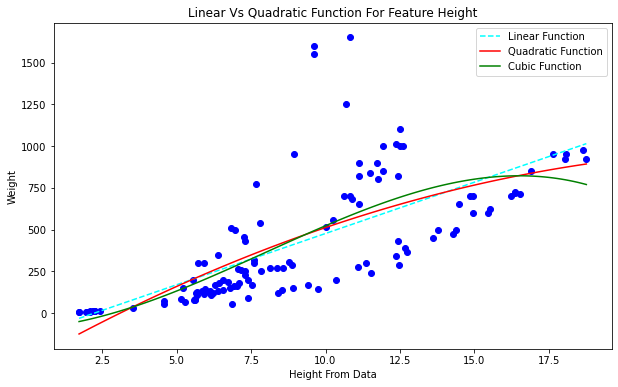

In [96]:
polynomial_plot(x_train.Height,y_train)

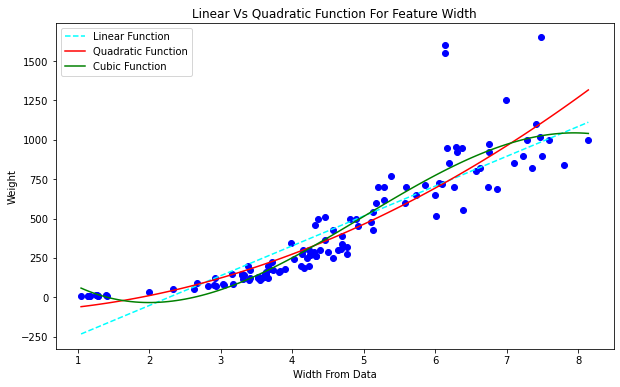

In [97]:
polynomial_plot(x_train.Width,y_train)

## Fit and visualize between "Height" and "Weight" for test data 

Text(0.5, 1.0, 'Height - Weight scatter from test data')

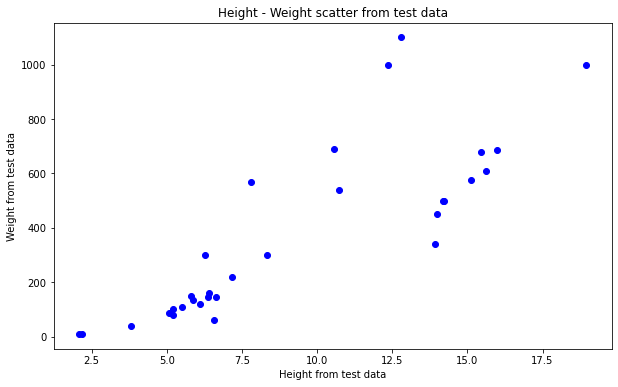

In [98]:
plt.scatter(x_test.Height, y_test,color = "blue")
plt.xlabel("Height from test data")
plt.ylabel("Weight from test data")
plt.title("Height - Weight scatter from test data")

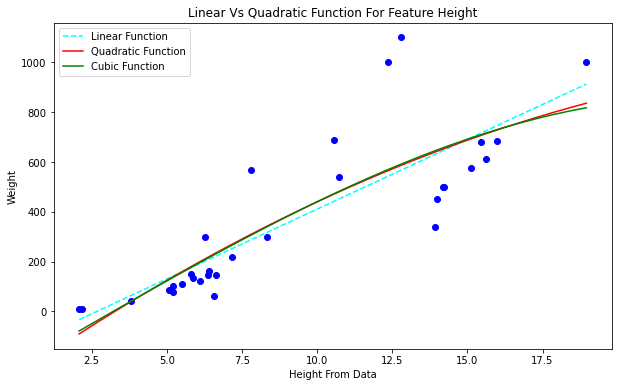

In [99]:
polynomial_plot(x_test.Height,y_test)

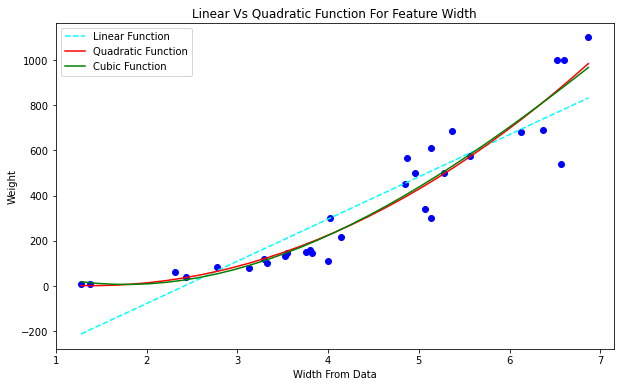

In [101]:
polynomial_plot(x_test.Width,y_test)

## Polynomial Regression using ScikitLearn

For example, we apply Polynomial Regression for quadratic function regression.

In [163]:
#function for quadratic regression
def poly_regression(feature,name):
    poly = PolynomialFeatures(degree = 2)
    train = np.asanyarray(x_train[[name]])
    learn = poly.fit_transform(train)
    reg = linear_model.LinearRegression()
    reg.fit(learn,y_train.Weight)
    print(reg.coef_)
    print(reg.intercept_)
    reg.coef_[0] = reg.intercept_
    return reg.coef_

In [164]:
poly_regression(x_train.Height,"Height")

[  0.         100.14564357  -1.97094286]
-292.5280719382906


array([-292.52807194,  100.14564357,   -1.97094286])

[  0.         100.14564357  -1.97094286]
-292.5280719382906


Text(0.5, 1.0, 'Height - Weight scatter from train data')

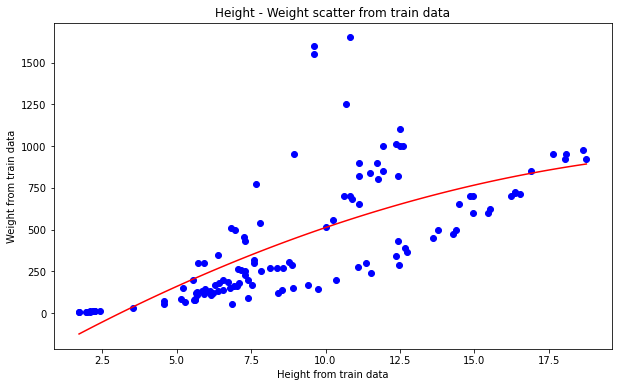

In [175]:
#Visualize relationship between "Height" and "Weight"
plt.scatter(x_train.Height, y_train,color = "blue")
plt.xlabel("Height from train data")
plt.ylabel("Weight from train data")
reg_height = poly_regression(x_train.Height,"Height")
valueheight_x = np.linspace(x_train.Height.min(),x_train.Height.max(),len(x_train.Height))
valueheight_y = reg_height[0] + reg_height[1]*valueheight_x+ reg_height[2] * pow(valueheight_x,2)
plt.plot(valueheight_x,valueheight_y,color = "red")
plt.title("Height - Weight scatter from train data")

In [176]:
poly_regression(x_train.Width,"Width")

[ 0.         14.06002044 19.58474647]
-96.04408659356329


array([-96.04408659,  14.06002044,  19.58474647])

[ 0.         14.06002044 19.58474647]
-96.04408659356329


Text(0.5, 1.0, 'Width - Weight scatter from train data')

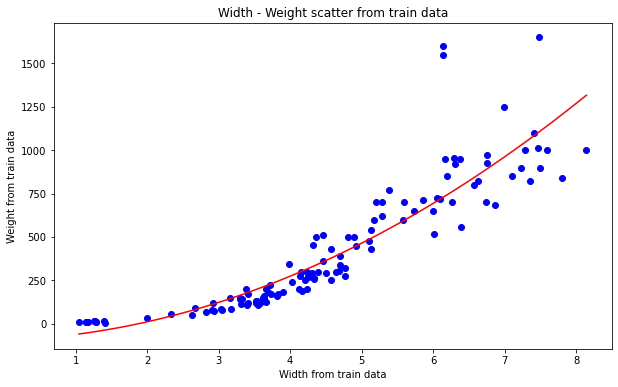

In [174]:
#Visualize relationship between "Width" and "Weight"
plt.scatter(x_train.Width, y_train,color = "blue")
plt.xlabel("Width from train data")
plt.ylabel("Weight from train data")
reg_width = poly_regression(x_train.Width,"Width")
valuewidth_x = np.linspace(x_train.Width.min(),x_train.Width.max(),len(x_train.Width))
valuewidth_y = reg_width[0] + reg_width[1]*valuewidth_x+ reg_width[2] * pow(valuewidth_x,2)
plt.plot(valuewidth_x,valuewidth_y,color = "red")
plt.title("Width - Weight scatter from train data")

### $\rightarrow$ From Numpy.Polyfit and ScikitLearn, we have the same results.

## Ordinary Least Squares Algorithm

* Lets the train the model using Ordinary Least Squares Algorithm
* This is one of the most basic linear regression algorithm.
* Mathematical formula used by ordinary least square algorithm is as below,

   ![ordinary_least_squares_formlua.png](https://github.com/satishgunjal/images/blob/master/ordinary_least_squares_formlua_1.png?raw=true)
* The objective of Ordinary Least Square Algorithm is to minimize the residual sum of squares. Here the term residual means 'deviation of predicted value(Xw) from actual value(y)'
* Note that, problem with ordinary least square model is size of coefficients increase exponentially with increase in model complexity

## Create poly regression with all independent variales.

Take a look at x_train data set variables.

In [177]:
x_train

,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
142,9.6000,6.1440,0,0,0,1,0,0
93,5.9532,3.6300,0,0,1,0,0,0
139,7.6800,5.3760,0,0,0,1,0,0
19,14.4738,5.7276,1,0,0,0,0,0
124,11.9328,7.2772,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
105,7.2828,4.5662,0,0,1,0,0,0
85,6.3840,3.5340,0,0,1,0,0,0
36,5.2983,2.8217,0,0,0,0,1,0
133,6.3960,3.9770,0,0,0,1,0,0


In [188]:
poly_ = PolynomialFeatures(degree = 2)
X_poly = poly_.fit_transform(x_train)
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train)

LinearRegression()

In [189]:
predictions = lm.predict(poly.fit_transform(x_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.9576486929091442


## Predicting The Test Data
* Check below table for weight from test data and predicted weight by our model
* We will also plot the scatter plot of weight from test data vs predicted weight

In [197]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
predictedWeight
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
output_df= pd.concat([actualWeight,predictedWeight],axis =1)
output_df.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,680.000000,160.000000,85.000000,60.000000,690.000000,575.000000,120.000000,135.000000,1000.000000,150.000000,...,78.000000,1000.00000,145.000000,340.000000,300.00000,500.000000,610.000000,567.000000,540.000000,500.000000
Predicted Weight,696.529702,127.662162,62.445148,59.358604,667.622044,626.852403,110.459286,136.855156,1007.699709,87.655502,...,90.727606,886.62298,137.545162,502.895601,378.78648,534.539937,600.657842,715.987293,615.042452,515.153716


### Model Evaluation

Plot a histogram of the residuals.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

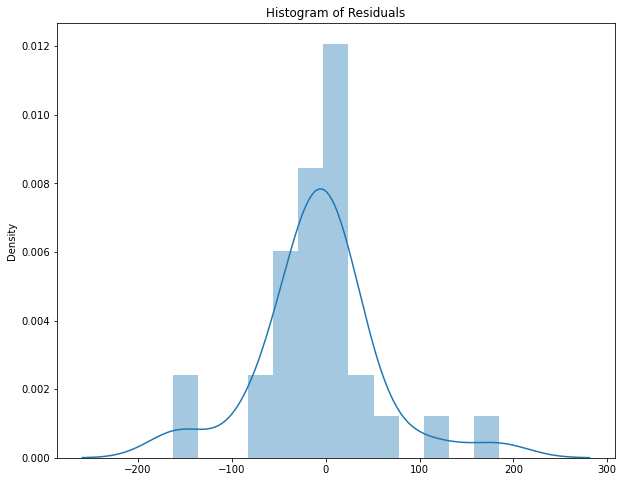

In [212]:
sns.distplot((y_test-predictions))
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Histogram of Residuals")

# Conclusion
* As you can see from above results our model score is over 90%, which is very good.
* And there are no negative weight values.
* So our approach of finding the outlier based on species and using second degree polynomial features worked!